In [53]:
import sys

sys.path.append('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/SCOPE_simulations')

from FLD_methods import * # import the necessary FLD methods needed to convolute signals and retrieve SIF

In [54]:
r_app_pathname = '/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/data_processing_scripts/r_app.csv'
fluor_pathname = '/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/data_processing_scripts/fluorescence26_08_2021_15:52_.csv'

In [55]:
# get instrument wavelengths

wavelengths_df = pd.read_excel('/Users/jameswallace/Desktop/Project/FENIX_Bands.xlsx', index_col=0)
wavelengths_df

,Wavelength,FWHM_2019,Unnamed: 3,Wavelength_2018,FWHM_2018,Unnamed: 6,Unnamed: 7
ID,,,,,,,
1,377.32,3.35,NaN,377.73,3.35,NaN,-0.41
2,380.67,3.35,NaN,381.09,3.35,NaN,-0.42
3,384.03,3.36,NaN,384.44,3.36,NaN,-0.41
4,387.39,3.36,NaN,387.80,3.36,NaN,-0.41
5,390.74,3.36,NaN,391.16,3.36,NaN,-0.42
...,...,...,...,...,...,...,...
445,2475.45,5.46,NaN,2476.32,5.46,NaN,-0.87
446,2480.91,5.45,NaN,2481.78,5.46,NaN,-0.87
447,2486.36,5.45,NaN,2487.24,5.46,NaN,-0.88


In [56]:
fenix_wavelengths = wavelengths_df['Wavelength']

In [57]:
# fast NDVI calculator

wavelengths = fenix_wavelengths

# get the indices of interest
index_795 = find_nearest(wavelengths, 795)
index_810 = find_nearest(wavelengths, 810)
index_665 = find_nearest(wavelengths, 665)
index_680 = find_nearest(wavelengths, 680)
index_475 = find_nearest(wavelengths, 475)
index_490 = find_nearest(wavelengths, 490)
index_435 = find_nearest(wavelengths, 435)
index_750 = find_nearest(wavelengths, 750)
index_695 = find_nearest(wavelengths, 695)
index_710 = find_nearest(wavelengths, 710)
index_735 = find_nearest(wavelengths, 735)
index_5675 = find_nearest(wavelengths, 567.5)
index_5725 = find_nearest(wavelengths, 572.5)
index_5275 = find_nearest(wavelengths, 527.5)
index_5335 = find_nearest(wavelengths, 533.5)

# define the NDVI function
def fast_ndvi(spectra):
    spectra = np.asarray(spectra)
    average_one = np.mean(spectra[index_795:index_810 + 1])
    average_two = np.mean(spectra[index_665:index_680 + 1])
    return((average_one - average_two) / (average_one + average_two))

def fast_simple_ratio(spectra):
    spectra = np.asarray(spectra)
    average_one = np.mean(spectra[index_795:index_810 + 1])
    average_two = np.mean(spectra[index_665:index_680 + 1])
    return(average_one / average_two)

def fast_evi(spectra):
    spectra = np.asarray(spectra)
    average_one = np.mean(spectra[index_795:index_810 + 1])
    average_two = np.mean(spectra[index_665:index_680 + 1])
    average_three = np.mean(spectra[index_475:index_490 + 1])
    return(2.5*((average_one - average_two) / (average_one + 6*average_two - 7.5*average_three + 1)))

def fast_ndvi_re(spectra):
    spectra = np.asarray(spectra)
    average_one = np.mean(spectra[index_735:index_750 + 1])
    average_two = np.mean(spectra[index_695:index_710 + 1])
    return((average_one - average_two) / (average_one + average_two))

def fast_pri(spectra):
    spectra = np.asarray(spectra)
    average_one = np.mean(spectra[index_5675:index_5725 + 1])
    average_two = np.mean(spectra[index_5275:index_5335 + 1])
    return((average_one - average_two) / (average_one + average_two))

In [58]:
# combine make features df

app_r_df = pd.read_csv(r_app_pathname, index_col=0)

In [59]:
app_r_df

,y,x,1,2,3,4,5,6,7,8,...,440,441,442,443,444,445,446,447,448,449
0,5810071.885,440168.202,0.012184,0.019913,0.025986,0.021729,0.028687,0.021423,0.014381,0.015686,...,0.042023,0.037598,0.037567,0.029633,0.051361,0.055328,0.436523,0.995605,0.760742,0.584961
1,5810071.885,440169.202,0.013885,0.020142,0.025986,0.017853,0.026978,0.016251,0.014595,0.016785,...,0.042023,0.034149,0.036530,0.028473,0.035858,0.048370,0.439941,1.003906,0.773438,0.580566
2,5810070.885,440167.202,0.015617,0.017899,0.022995,0.022064,0.029633,0.021423,0.014824,0.015686,...,0.042023,0.038727,0.036530,0.028473,0.042755,0.050690,0.436523,0.995605,0.748047,0.589355
3,5810070.885,440168.202,0.012184,0.019913,0.025986,0.021729,0.028687,0.021423,0.014381,0.015686,...,0.042023,0.037598,0.037567,0.029633,0.051361,0.055328,0.436523,0.995605,0.760742,0.584961
4,5810070.885,440169.202,0.014305,0.020203,0.022995,0.024338,0.032043,0.017288,0.015656,0.015747,...,0.022461,0.029541,0.029144,0.021561,0.032410,0.036774,0.443604,1.003906,0.748047,0.589355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,5809816.885,440012.202,0.013237,0.032806,0.026367,0.021896,0.027527,0.028046,0.015366,0.019226,...,0.084351,0.060547,0.067017,0.060730,0.078918,0.092468,0.504395,1.101562,0.842285,0.661133
30196,5809816.885,440013.202,0.014977,0.030457,0.025635,0.024643,0.027435,0.028091,0.015541,0.018539,...,0.095764,0.073181,0.082764,0.078003,0.085815,0.097107,0.504395,1.077148,0.842285,0.647949
30197,5809816.885,440014.202,0.013588,0.030853,0.026367,0.023193,0.027435,0.028091,0.015312,0.018494,...,0.110352,0.074341,0.094360,0.079163,0.092712,0.113281,0.511719,1.093750,0.848633,0.634277
30198,5809815.885,440011.202,0.012817,0.029541,0.026520,0.020737,0.028030,0.023773,0.015602,0.016663,...,0.081116,0.057098,0.056519,0.054993,0.065125,0.085510,0.482910,1.060547,0.880371,0.647949


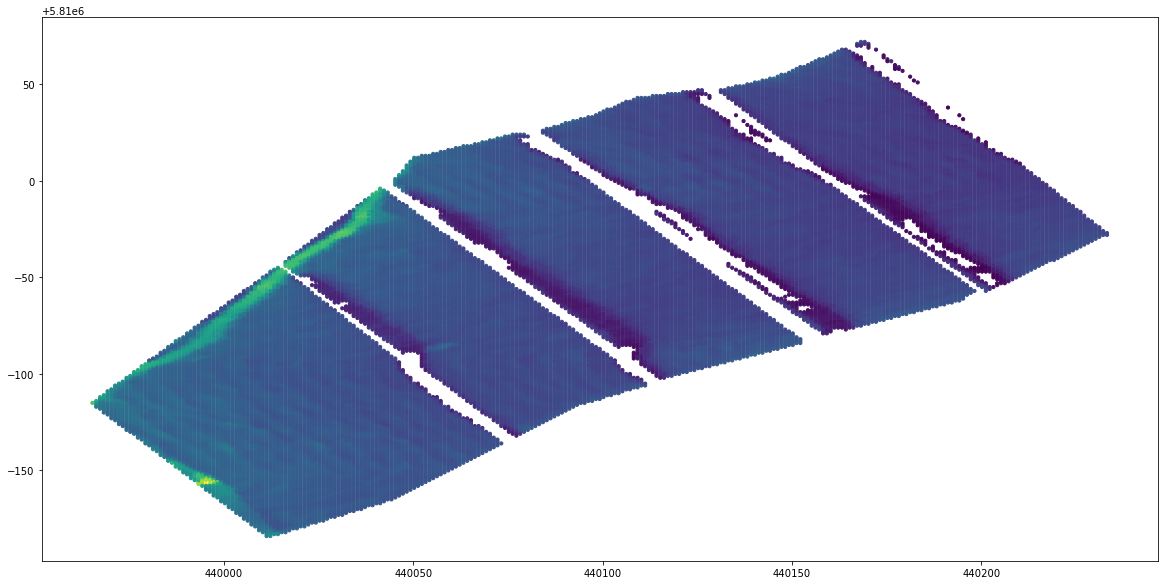

In [60]:
plt.figure(figsize=(20,10))
plt.scatter(app_r_df['x'], app_r_df['y'], c=app_r_df['40'], s=10)

In [61]:
app_r_df['simple_ratio'] = None
app_r_df['NDVI'] = None
app_r_df['EVI'] = None
app_r_df['NDVI_re'] = None
app_r_df['PRI'] = None

In [62]:
# now get the O2A SIF

fluor_df = pd.read_csv('/Users/jameswallace/Desktop/SIF_MISCADA_PROJECT/data_processing_scripts/fluorescence26_08_2021_15:43_.csv', index_col=0)

In [63]:
fluor_df

,x,y,fluor
6942,440054.202,5809994.885,11.538428
6776,440053.202,5809995.885,11.272040
6613,440053.202,5809996.885,11.249376
6614,440054.202,5809996.885,11.221862
6615,440055.202,5809996.885,11.221862
...,...,...,...
9075,440115.202,5809982.885,0.010087
5521,440092.202,5810003.885,0.006467
5522,440093.202,5810003.885,0.006467
18060,440150.202,5809934.885,0.004076


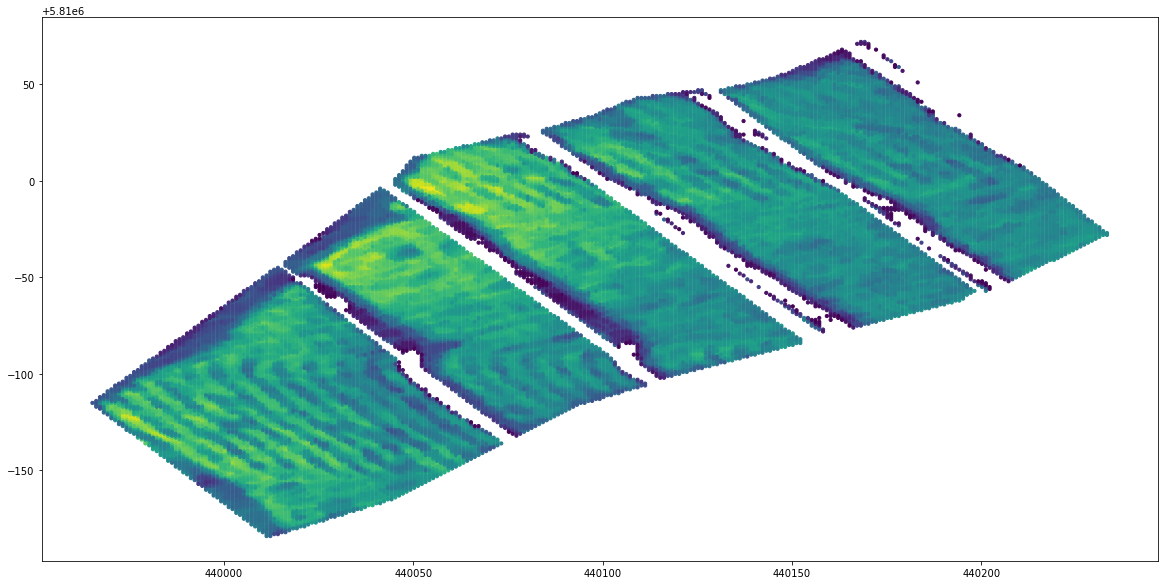

In [64]:
plt.figure(figsize=(20,10))
plt.scatter(fluor_df['x'], fluor_df['y'], c=fluor_df['fluor'], s= 10)

In [65]:
len(fluor_df)

28690

In [66]:
len(app_r_df)

29158

In [67]:
app_r_df['O2A_SIF'] = fluor_df['fluor']

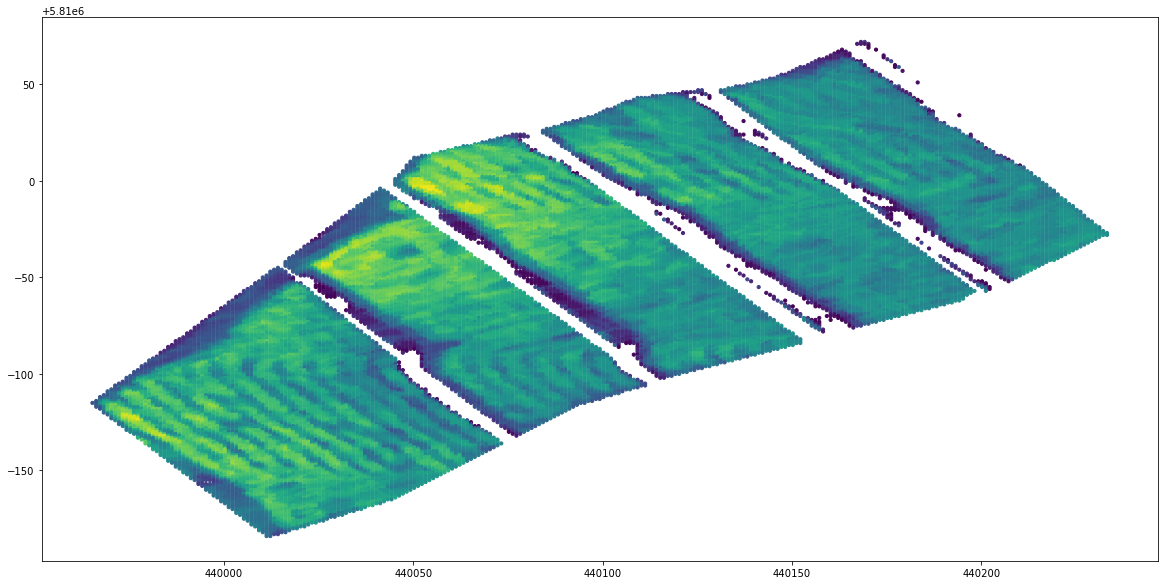

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(app_r_df['x'], app_r_df['y'], c=app_r_df['O2A_SIF'], s=10)

In [69]:
# now calc SVIs

for i in range(len(app_r_df)):
    app_r_df['simple_ratio'][i] = fast_simple_ratio(app_r_df.iloc[i])
    app_r_df['NDVI'][i] = fast_ndvi(app_r_df.iloc[i])
    app_r_df['NDVI_re'][i] = fast_ndvi_re(app_r_df.iloc[i])
    app_r_df['EVI'][i] = fast_evi(app_r_df.iloc[i])
    app_r_df['PRI'][i] = fast_pri(app_r_df.iloc[i])
    print(len(app_r_df) - i)

<ipython-input-69-e0ac24ae8cd4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_r_df['simple_ratio'][i] = fast_simple_ratio(app_r_df.iloc[i])
<ipython-input-69-e0ac24ae8cd4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_r_df['NDVI'][i] = fast_ndvi(app_r_df.iloc[i])
<ipython-input-69-e0ac24ae8cd4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_r_df['NDVI_re'][i] = fast_ndvi_re(app_r_df.iloc[i])
<ipython-input-69-e0ac24

29158
29157
29156
29155
29154
29153
29152
29151
29150
29149
29148
29147
29146
29145
29144
29143
29142
29141
29140
29139
29138
29137
29136
29135
29134
29133
29132
29131
29130
29129
29128
29127
29126
29125
29124
29123
29122
29121
29120
29119
29118
29117
29116
29115
29114
29113
29112
29111
29110
29109
29108
29107
29106
29105
29104
29103
29102
29101
29100
29099
29098
29097
29096
29095
29094
29093
29092
29091
29090
29089
29088
29087
29086
29085
29084
29083
29082
29081
29080
29079
29078
29077
29076
29075
29074
29073
29072
29071
29070
29069
29068
29067
29066
29065
29064
29063
29062
29061
29060
29059
29058
29057
29056
29055
29054
29053
29052
29051
29050
29049
29048
29047
29046
29045
29044
29043
29042
29041
29040
29039
29038
29037
29036
29035
29034
29033
29032
29031
29030
29029
29028
29027
29026
29025
29024
29023
29022
29021
29020
29019
29018
29017
29016
29015
29014
29013
29012
29011
29010
29009
29008
29007
29006
29005
29004
29003
29002
29001
29000
28999
28998
28997
28996
28995
28994
28993
2899

27771
27770
27769
27768
27767
27766
27765
27764
27763
27762
27761
27760
27759
27758
27757
27756
27755
27754
27753
27752
27751
27750
27749
27748
27747
27746
27745
27744
27743
27742
27741
27740
27739
27738
27737
27736
27735
27734
27733
27732
27731
27730
27729
27728
27727
27726
27725
27724
27723
27722
27721
27720
27719
27718
27717
27716
27715
27714
27713
27712
27711
27710
27709
27708
27707
27706
27705
27704
27703
27702
27701
27700
27699
27698
27697
27696
27695
27694
27693
27692
27691
27690
27689
27688
27687
27686
27685
27684
27683
27682
27681
27680
27679
27678
27677
27676
27675
27674
27673
27672
27671
27670
27669
27668
27667
27666
27665
27664
27663
27662
27661
27660
27659
27658
27657
27656
27655
27654
27653
27652
27651
27650
27649
27648
27647
27646
27645
27644
27643
27642
27641
27640
27639
27638
27637
27636
27635
27634
27633
27632
27631
27630
27629
27628
27627
27626
27625
27624
27623
27622
27621
27620
27619
27618
27617
27616
27615
27614
27613
27612
27611
27610
27609
27608
27607
27606
2760

26372
26371
26370
26369
26368
26367
26366
26365
26364
26363
26362
26361
26360
26359
26358
26357
26356
26355
26354
26353
26352
26351
26350
26349
26348
26347
26346
26345
26344
26343
26342
26341
26340
26339
26338
26337
26336
26335
26334
26333
26332
26331
26330
26329
26328
26327
26326
26325
26324
26323
26322
26321
26320
26319
26318
26317
26316
26315
26314
26313
26312
26311
26310
26309
26308
26307
26306
26305
26304
26303
26302
26301
26300
26299
26298
26297
26296
26295
26294
26293
26292
26291
26290
26289
26288
26287
26286
26285
26284
26283
26282
26281
26280
26279
26278
26277
26276
26275
26274
26273
26272
26271
26270
26269
26268
26267
26266
26265
26264
26263
26262
26261
26260
26259
26258
26257
26256
26255
26254
26253
26252
26251
26250
26249
26248
26247
26246
26245
26244
26243
26242
26241
26240
26239
26238
26237
26236
26235
26234
26233
26232
26231
26230
26229
26228
26227
26226
26225
26224
26223
26222
26221
26220
26219
26218
26217
26216
26215
26214
26213
26212
26211
26210
26209
26208
26207
2620

24965
24964
24963
24962
24961
24960
24959
24958
24957
24956
24955
24954
24953
24952
24951
24950
24949
24948
24947
24946
24945
24944
24943
24942
24941
24940
24939
24938
24937
24936
24935
24934
24933
24932
24931
24930
24929
24928
24927
24926
24925
24924
24923
24922
24921
24920
24919
24918
24917
24916
24915
24914
24913
24912
24911
24910
24909
24908
24907
24906
24905
24904
24903
24902
24901
24900
24899
24898
24897
24896
24895
24894
24893
24892
24891
24890
24889
24888
24887
24886
24885
24884
24883
24882
24881
24880
24879
24878
24877
24876
24875
24874
24873
24872
24871
24870
24869
24868
24867
24866
24865
24864
24863
24862
24861
24860
24859
24858
24857
24856
24855
24854
24853
24852
24851
24850
24849
24848
24847
24846
24845
24844
24843
24842
24841
24840
24839
24838
24837
24836
24835
24834
24833
24832
24831
24830
24829
24828
24827
24826
24825
24824
24823
24822
24821
24820
24819
24818
24817
24816
24815
24814
24813
24812
24811
24810
24809
24808
24807
24806
24805
24804
24803
24802
24801
24800
2479

23578
23577
23576
23575
23574
23573
23572
23571
23570
23569
23568
23567
23566
23565
23564
23563
23562
23561
23560
23559
23558
23557
23556
23555
23554
23553
23552
23551
23550
23549
23548
23547
23546
23545
23544
23543
23542
23541
23540
23539
23538
23537
23536
23535
23534
23533
23532
23531
23530
23529
23528
23527
23526
23525
23524
23523
23522
23521
23520
23519
23518
23517
23516
23515
23514
23513
23512
23511
23510
23509
23508
23507
23506
23505
23504
23503
23502
23501
23500
23499
23498
23497
23496
23495
23494
23493
23492
23491
23490
23489
23488
23487
23486
23485
23484
23483
23482
23481
23480
23479
23478
23477
23476
23475
23474
23473
23472
23471
23470
23469
23468
23467
23466
23465
23464
23463
23462
23461
23460
23459
23458
23457
23456
23455
23454
23453
23452
23451
23450
23449
23448
23447
23446
23445
23444
23443
23442
23441
23440
23439
23438
23437
23436
23435
23434
23433
23432
23431
23430
23429
23428
23427
23426
23425
23424
23423
23422
23421
23420
23419
23418
23417
23416
23415
23414
23413
2341

22200
22199
22198
22197
22196
22195
22194
22193
22192
22191
22190
22189
22188
22187
22186
22185
22184
22183
22182
22181
22180
22179
22178
22177
22176
22175
22174
22173
22172
22171
22170
22169
22168
22167
22166
22165
22164
22163
22162
22161
22160
22159
22158
22157
22156
22155
22154
22153
22152
22151
22150
22149
22148
22147
22146
22145
22144
22143
22142
22141
22140
22139
22138
22137
22136
22135
22134
22133
22132
22131
22130
22129
22128
22127
22126
22125
22124
22123
22122
22121
22120
22119
22118
22117
22116
22115
22114
22113
22112
22111
22110
22109
22108
22107
22106
22105
22104
22103
22102
22101
22100
22099
22098
22097
22096
22095
22094
22093
22092
22091
22090
22089
22088
22087
22086
22085
22084
22083
22082
22081
22080
22079
22078
22077
22076
22075
22074
22073
22072
22071
22070
22069
22068
22067
22066
22065
22064
22063
22062
22061
22060
22059
22058
22057
22056
22055
22054
22053
22052
22051
22050
22049
22048
22047
22046
22045
22044
22043
22042
22041
22040
22039
22038
22037
22036
22035
2203

20806
20805
20804
20803
20802
20801
20800
20799
20798
20797
20796
20795
20794
20793
20792
20791
20790
20789
20788
20787
20786
20785
20784
20783
20782
20781
20780
20779
20778
20777
20776
20775
20774
20773
20772
20771
20770
20769
20768
20767
20766
20765
20764
20763
20762
20761
20760
20759
20758
20757
20756
20755
20754
20753
20752
20751
20750
20749
20748
20747
20746
20745
20744
20743
20742
20741
20740
20739
20738
20737
20736
20735
20734
20733
20732
20731
20730
20729
20728
20727
20726
20725
20724
20723
20722
20721
20720
20719
20718
20717
20716
20715
20714
20713
20712
20711
20710
20709
20708
20707
20706
20705
20704
20703
20702
20701
20700
20699
20698
20697
20696
20695
20694
20693
20692
20691
20690
20689
20688
20687
20686
20685
20684
20683
20682
20681
20680
20679
20678
20677
20676
20675
20674
20673
20672
20671
20670
20669
20668
20667
20666
20665
20664
20663
20662
20661
20660
20659
20658
20657
20656
20655
20654
20653
20652
20651
20650
20649
20648
20647
20646
20645
20644
20643
20642
20641
2064

19435
19434
19433
19432
19431
19430
19429
19428
19427
19426
19425
19424
19423
19422
19421
19420
19419
19418
19417
19416
19415
19414
19413
19412
19411
19410
19409
19408
19407
19406
19405
19404
19403
19402
19401
19400
19399
19398
19397
19396
19395
19394
19393
19392
19391
19390
19389
19388
19387
19386
19385
19384
19383
19382
19381
19380
19379
19378
19377
19376
19375
19374
19373
19372
19371
19370
19369
19368
19367
19366
19365
19364
19363
19362
19361
19360
19359
19358
19357
19356
19355
19354
19353
19352
19351
19350
19349
19348
19347
19346
19345
19344
19343
19342
19341
19340
19339
19338
19337
19336
19335
19334
19333
19332
19331
19330
19329
19328
19327
19326
19325
19324
19323
19322
19321
19320
19319
19318
19317
19316
19315
19314
19313
19312
19311
19310
19309
19308
19307
19306
19305
19304
19303
19302
19301
19300
19299
19298
19297
19296
19295
19294
19293
19292
19291
19290
19289
19288
19287
19286
19285
19284
19283
19282
19281
19280
19279
19278
19277
19276
19275
19274
19273
19272
19271
19270
1926

18034
18033
18032
18031
18030
18029
18028
18027
18026
18025
18024
18023
18022
18021
18020
18019
18018
18017
18016
18015
18014
18013
18012
18011
18010
18009
18008
18007
18006
18005
18004
18003
18002
18001
18000
17999
17998
17997
17996
17995
17994
17993
17992
17991
17990
17989
17988
17987
17986
17985
17984
17983
17982
17981
17980
17979
17978
17977
17976
17975
17974
17973
17972
17971
17970
17969
17968
17967
17966
17965
17964
17963
17962
17961
17960
17959
17958
17957
17956
17955
17954
17953
17952
17951
17950
17949
17948
17947
17946
17945
17944
17943
17942
17941
17940
17939
17938
17937
17936
17935
17934
17933
17932
17931
17930
17929
17928
17927
17926
17925
17924
17923
17922
17921
17920
17919
17918
17917
17916
17915
17914
17913
17912
17911
17910
17909
17908
17907
17906
17905
17904
17903
17902
17901
17900
17899
17898
17897
17896
17895
17894
17893
17892
17891
17890
17889
17888
17887
17886
17885
17884
17883
17882
17881
17880
17879
17878
17877
17876
17875
17874
17873
17872
17871
17870
17869
1786

16663
16662
16661
16660
16659
16658
16657
16656
16655
16654
16653
16652
16651
16650
16649
16648
16647
16646
16645
16644
16643
16642
16641
16640
16639
16638
16637
16636
16635
16634
16633
16632
16631
16630
16629
16628
16627
16626
16625
16624
16623
16622
16621
16620
16619
16618
16617
16616
16615
16614
16613
16612
16611
16610
16609
16608
16607
16606
16605
16604
16603
16602
16601
16600
16599
16598
16597
16596
16595
16594
16593
16592
16591
16590
16589
16588
16587
16586
16585
16584
16583
16582
16581
16580
16579
16578
16577
16576
16575
16574
16573
16572
16571
16570
16569
16568
16567
16566
16565
16564
16563
16562
16561
16560
16559
16558
16557
16556
16555
16554
16553
16552
16551
16550
16549
16548
16547
16546
16545
16544
16543
16542
16541
16540
16539
16538
16537
16536
16535
16534
16533
16532
16531
16530
16529
16528
16527
16526
16525
16524
16523
16522
16521
16520
16519
16518
16517
16516
16515
16514
16513
16512
16511
16510
16509
16508
16507
16506
16505
16504
16503
16502
16501
16500
16499
16498
1649

15284
15283
15282
15281
15280
15279
15278
15277
15276
15275
15274
15273
15272
15271
15270
15269
15268
15267
15266
15265
15264
15263
15262
15261
15260
15259
15258
15257
15256
15255
15254
15253
15252
15251
15250
15249
15248
15247
15246
15245
15244
15243
15242
15241
15240
15239
15238
15237
15236
15235
15234
15233
15232
15231
15230
15229
15228
15227
15226
15225
15224
15223
15222
15221
15220
15219
15218
15217
15216
15215
15214
15213
15212
15211
15210
15209
15208
15207
15206
15205
15204
15203
15202
15201
15200
15199
15198
15197
15196
15195
15194
15193
15192
15191
15190
15189
15188
15187
15186
15185
15184
15183
15182
15181
15180
15179
15178
15177
15176
15175
15174
15173
15172
15171
15170
15169
15168
15167
15166
15165
15164
15163
15162
15161
15160
15159
15158
15157
15156
15155
15154
15153
15152
15151
15150
15149
15148
15147
15146
15145
15144
15143
15142
15141
15140
15139
15138
15137
15136
15135
15134
15133
15132
15131
15130
15129
15128
15127
15126
15125
15124
15123
15122
15121
15120
15119
1511

13867
13866
13865
13864
13863
13862
13861
13860
13859
13858
13857
13856
13855
13854
13853
13852
13851
13850
13849
13848
13847
13846
13845
13844
13843
13842
13841
13840
13839
13838
13837
13836
13835
13834
13833
13832
13831
13830
13829
13828
13827
13826
13825
13824
13823
13822
13821
13820
13819
13818
13817
13816
13815
13814
13813
13812
13811
13810
13809
13808
13807
13806
13805
13804
13803
13802
13801
13800
13799
13798
13797
13796
13795
13794
13793
13792
13791
13790
13789
13788
13787
13786
13785
13784
13783
13782
13781
13780
13779
13778
13777
13776
13775
13774
13773
13772
13771
13770
13769
13768
13767
13766
13765
13764
13763
13762
13761
13760
13759
13758
13757
13756
13755
13754
13753
13752
13751
13750
13749
13748
13747
13746
13745
13744
13743
13742
13741
13740
13739
13738
13737
13736
13735
13734
13733
13732
13731
13730
13729
13728
13727
13726
13725
13724
13723
13722
13721
13720
13719
13718
13717
13716
13715
13714
13713
13712
13711
13710
13709
13708
13707
13706
13705
13704
13703
13702
1370

12446
12445
12444
12443
12442
12441
12440
12439
12438
12437
12436
12435
12434
12433
12432
12431
12430
12429
12428
12427
12426
12425
12424
12423
12422
12421
12420
12419
12418
12417
12416
12415
12414
12413
12412
12411
12410
12409
12408
12407
12406
12405
12404
12403
12402
12401
12400
12399
12398
12397
12396
12395
12394
12393
12392
12391
12390
12389
12388
12387
12386
12385
12384
12383
12382
12381
12380
12379
12378
12377
12376
12375
12374
12373
12372
12371
12370
12369
12368
12367
12366
12365
12364
12363
12362
12361
12360
12359
12358
12357
12356
12355
12354
12353
12352
12351
12350
12349
12348
12347
12346
12345
12344
12343
12342
12341
12340
12339
12338
12337
12336
12335
12334
12333
12332
12331
12330
12329
12328
12327
12326
12325
12324
12323
12322
12321
12320
12319
12318
12317
12316
12315
12314
12313
12312
12311
12310
12309
12308
12307
12306
12305
12304
12303
12302
12301
12300
12299
12298
12297
12296
12295
12294
12293
12292
12291
12290
12289
12288
12287
12286
12285
12284
12283
12282
12281
1228

11030
11029
11028
11027
11026
11025
11024
11023
11022
11021
11020
11019
11018
11017
11016
11015
11014
11013
11012
11011
11010
11009
11008
11007
11006
11005
11004
11003
11002
11001
11000
10999
10998
10997
10996
10995
10994
10993
10992
10991
10990
10989
10988
10987
10986
10985
10984
10983
10982
10981
10980
10979
10978
10977
10976
10975
10974
10973
10972
10971
10970
10969
10968
10967
10966
10965
10964
10963
10962
10961
10960
10959
10958
10957
10956
10955
10954
10953
10952
10951
10950
10949
10948
10947
10946
10945
10944
10943
10942
10941
10940
10939
10938
10937
10936
10935
10934
10933
10932
10931
10930
10929
10928
10927
10926
10925
10924
10923
10922
10921
10920
10919
10918
10917
10916
10915
10914
10913
10912
10911
10910
10909
10908
10907
10906
10905
10904
10903
10902
10901
10900
10899
10898
10897
10896
10895
10894
10893
10892
10891
10890
10889
10888
10887
10886
10885
10884
10883
10882
10881
10880
10879
10878
10877
10876
10875
10874
10873
10872
10871
10870
10869
10868
10867
10866
10865
1086

9596
9595
9594
9593
9592
9591
9590
9589
9588
9587
9586
9585
9584
9583
9582
9581
9580
9579
9578
9577
9576
9575
9574
9573
9572
9571
9570
9569
9568
9567
9566
9565
9564
9563
9562
9561
9560
9559
9558
9557
9556
9555
9554
9553
9552
9551
9550
9549
9548
9547
9546
9545
9544
9543
9542
9541
9540
9539
9538
9537
9536
9535
9534
9533
9532
9531
9530
9529
9528
9527
9526
9525
9524
9523
9522
9521
9520
9519
9518
9517
9516
9515
9514
9513
9512
9511
9510
9509
9508
9507
9506
9505
9504
9503
9502
9501
9500
9499
9498
9497
9496
9495
9494
9493
9492
9491
9490
9489
9488
9487
9486
9485
9484
9483
9482
9481
9480
9479
9478
9477
9476
9475
9474
9473
9472
9471
9470
9469
9468
9467
9466
9465
9464
9463
9462
9461
9460
9459
9458
9457
9456
9455
9454
9453
9452
9451
9450
9449
9448
9447
9446
9445
9444
9443
9442
9441
9440
9439
9438
9437
9436
9435
9434
9433
9432
9431
9430
9429
9428
9427
9426
9425
9424
9423
9422
9421
9420
9419
9418
9417
9416
9415
9414
9413
9412
9411
9410
9409
9408
9407
9406
9405
9404
9403
9402
9401
9400
9399
9398
9397


7901
7900
7899
7898
7897
7896
7895
7894
7893
7892
7891
7890
7889
7888
7887
7886
7885
7884
7883
7882
7881
7880
7879
7878
7877
7876
7875
7874
7873
7872
7871
7870
7869
7868
7867
7866
7865
7864
7863
7862
7861
7860
7859
7858
7857
7856
7855
7854
7853
7852
7851
7850
7849
7848
7847
7846
7845
7844
7843
7842
7841
7840
7839
7838
7837
7836
7835
7834
7833
7832
7831
7830
7829
7828
7827
7826
7825
7824
7823
7822
7821
7820
7819
7818
7817
7816
7815
7814
7813
7812
7811
7810
7809
7808
7807
7806
7805
7804
7803
7802
7801
7800
7799
7798
7797
7796
7795
7794
7793
7792
7791
7790
7789
7788
7787
7786
7785
7784
7783
7782
7781
7780
7779
7778
7777
7776
7775
7774
7773
7772
7771
7770
7769
7768
7767
7766
7765
7764
7763
7762
7761
7760
7759
7758
7757
7756
7755
7754
7753
7752
7751
7750
7749
7748
7747
7746
7745
7744
7743
7742
7741
7740
7739
7738
7737
7736
7735
7734
7733
7732
7731
7730
7729
7728
7727
7726
7725
7724
7723
7722
7721
7720
7719
7718
7717
7716
7715
7714
7713
7712
7711
7710
7709
7708
7707
7706
7705
7704
7703
7702


6219
6218
6217
6216
6215
6214
6213
6212
6211
6210
6209
6208
6207
6206
6205
6204
6203
6202
6201
6200
6199
6198
6197
6196
6195
6194
6193
6192
6191
6190
6189
6188
6187
6186
6185
6184
6183
6182
6181
6180
6179
6178
6177
6176
6175
6174
6173
6172
6171
6170
6169
6168
6167
6166
6165
6164
6163
6162
6161
6160
6159
6158
6157
6156
6155
6154
6153
6152
6151
6150
6149
6148
6147
6146
6145
6144
6143
6142
6141
6140
6139
6138
6137
6136
6135
6134
6133
6132
6131
6130
6129
6128
6127
6126
6125
6124
6123
6122
6121
6120
6119
6118
6117
6116
6115
6114
6113
6112
6111
6110
6109
6108
6107
6106
6105
6104
6103
6102
6101
6100
6099
6098
6097
6096
6095
6094
6093
6092
6091
6090
6089
6088
6087
6086
6085
6084
6083
6082
6081
6080
6079
6078
6077
6076
6075
6074
6073
6072
6071
6070
6069
6068
6067
6066
6065
6064
6063
6062
6061
6060
6059
6058
6057
6056
6055
6054
6053
6052
6051
6050
6049
6048
6047
6046
6045
6044
6043
6042
6041
6040
6039
6038
6037
6036
6035
6034
6033
6032
6031
6030
6029
6028
6027
6026
6025
6024
6023
6022
6021
6020


4541
4540
4539
4538
4537
4536
4535
4534
4533
4532
4531
4530
4529
4528
4527
4526
4525
4524
4523
4522
4521
4520
4519
4518
4517
4516
4515
4514
4513
4512
4511
4510
4509
4508
4507
4506
4505
4504
4503
4502
4501
4500
4499
4498
4497
4496
4495
4494
4493
4492
4491
4490
4489
4488
4487
4486
4485
4484
4483
4482
4481
4480
4479
4478
4477
4476
4475
4474
4473
4472
4471
4470
4469
4468
4467
4466
4465
4464
4463
4462
4461
4460
4459
4458
4457
4456
4455
4454
4453
4452
4451
4450
4449
4448
4447
4446
4445
4444
4443
4442
4441
4440
4439
4438
4437
4436
4435
4434
4433
4432
4431
4430
4429
4428
4427
4426
4425
4424
4423
4422
4421
4420
4419
4418
4417
4416
4415
4414
4413
4412
4411
4410
4409
4408
4407
4406
4405
4404
4403
4402
4401
4400
4399
4398
4397
4396
4395
4394
4393
4392
4391
4390
4389
4388
4387
4386
4385
4384
4383
4382
4381
4380
4379
4378
4377
4376
4375
4374
4373
4372
4371
4370
4369
4368
4367
4366
4365
4364
4363
4362
4361
4360
4359
4358
4357
4356
4355
4354
4353
4352
4351
4350
4349
4348
4347
4346
4345
4344
4343
4342


2902
2901
2900
2899
2898
2897
2896
2895
2894
2893
2892
2891
2890
2889
2888
2887
2886
2885
2884
2883
2882
2881
2880
2879
2878
2877
2876
2875
2874
2873
2872
2871
2870
2869
2868
2867
2866
2865
2864
2863
2862
2861
2860
2859
2858
2857
2856
2855
2854
2853
2852
2851
2850
2849
2848
2847
2846
2845
2844
2843
2842
2841
2840
2839
2838
2837
2836
2835
2834
2833
2832
2831
2830
2829
2828
2827
2826
2825
2824
2823
2822
2821
2820
2819
2818
2817
2816
2815
2814
2813
2812
2811
2810
2809
2808
2807
2806
2805
2804
2803
2802
2801
2800
2799
2798
2797
2796
2795
2794
2793
2792
2791
2790
2789
2788
2787
2786
2785
2784
2783
2782
2781
2780
2779
2778
2777
2776
2775
2774
2773
2772
2771
2770
2769
2768
2767
2766
2765
2764
2763
2762
2761
2760
2759
2758
2757
2756
2755
2754
2753
2752
2751
2750
2749
2748
2747
2746
2745
2744
2743
2742
2741
2740
2739
2738
2737
2736
2735
2734
2733
2732
2731
2730
2729
2728
2727
2726
2725
2724
2723
2722
2721
2720
2719
2718
2717
2716
2715
2714
2713
2712
2711
2710
2709
2708
2707
2706
2705
2704
2703


1228
1227
1226
1225
1224
1223
1222
1221
1220
1219
1218
1217
1216
1215
1214
1213
1212
1211
1210
1209
1208
1207
1206
1205
1204
1203
1202
1201
1200
1199
1198
1197
1196
1195
1194
1193
1192
1191
1190
1189
1188
1187
1186
1185
1184
1183
1182
1181
1180
1179
1178
1177
1176
1175
1174
1173
1172
1171
1170
1169
1168
1167
1166
1165
1164
1163
1162
1161
1160
1159
1158
1157
1156
1155
1154
1153
1152
1151
1150
1149
1148
1147
1146
1145
1144
1143
1142
1141
1140
1139
1138
1137
1136
1135
1134
1133
1132
1131
1130
1129
1128
1127
1126
1125
1124
1123
1122
1121
1120
1119
1118
1117
1116
1115
1114
1113
1112
1111
1110
1109
1108
1107
1106
1105
1104
1103
1102
1101
1100
1099
1098
1097
1096
1095
1094
1093
1092
1091
1090
1089
1088
1087
1086
1085
1084
1083
1082
1081
1080
1079
1078
1077
1076
1075
1074
1073
1072
1071
1070
1069
1068
1067
1066
1065
1064
1063
1062
1061
1060
1059
1058
1057
1056
1055
1054
1053
1052
1051
1050
1049
1048
1047
1046
1045
1044
1043
1042
1041
1040
1039
1038
1037
1036
1035
1034
1033
1032
1031
1030
1029


In [73]:
app_r_df

,y,x,1,2,3,4,5,6,7,8,...,446,447,448,449,simple_ratio,NDVI,EVI,NDVI_re,PRI,O2A_SIF
0,5810071.885,440168.202,0.012184,0.019913,0.025986,0.021729,0.028687,0.021423,0.014381,0.015686,...,0.436523,0.995605,0.760742,0.584961,9.26056,0.805079,0.466775,0.57174,0.185515,0.997675
1,5810071.885,440169.202,0.013885,0.020142,0.025986,0.017853,0.026978,0.016251,0.014595,0.016785,...,0.439941,1.003906,0.773438,0.580566,10.3791,0.824239,0.501577,0.602609,0.206121,2.006069
2,5810070.885,440167.202,0.015617,0.017899,0.022995,0.022064,0.029633,0.021423,0.014824,0.015686,...,0.436523,0.995605,0.748047,0.589355,9.12317,0.802433,0.448119,0.581052,0.183555,0.856590
3,5810070.885,440168.202,0.012184,0.019913,0.025986,0.021729,0.028687,0.021423,0.014381,0.015686,...,0.436523,0.995605,0.760742,0.584961,9.26056,0.805079,0.466775,0.57174,0.185515,0.997675
4,5810070.885,440169.202,0.014305,0.020203,0.022995,0.024338,0.032043,0.017288,0.015656,0.015747,...,0.443604,1.003906,0.748047,0.589355,10.2828,0.82274,0.428645,0.592965,0.199114,0.660643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,5809816.885,440012.202,0.013237,0.032806,0.026367,0.021896,0.027527,0.028046,0.015366,0.019226,...,0.504395,1.101562,0.842285,0.661133,None,None,None,None,None,3.806752
30196,5809816.885,440013.202,0.014977,0.030457,0.025635,0.024643,0.027435,0.028091,0.015541,0.018539,...,0.504395,1.077148,0.842285,0.647949,None,None,None,None,None,2.559160
30197,5809816.885,440014.202,0.013588,0.030853,0.026367,0.023193,0.027435,0.028091,0.015312,0.018494,...,0.511719,1.093750,0.848633,0.634277,None,None,None,None,None,2.193027
30198,5809815.885,440011.202,0.012817,0.029541,0.026520,0.020737,0.028030,0.023773,0.015602,0.016663,...,0.482910,1.060547,0.880371,0.647949,None,None,None,None,None,4.218782


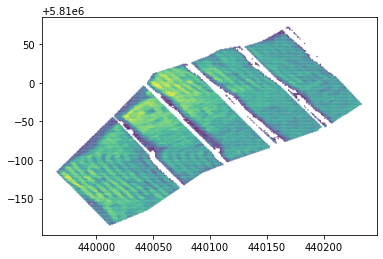

In [79]:
plt.scatter(app_r_df['x'], app_r_df['y'], c=app_r_df['O2A_SIF'], s= 0.1)

(array([5.300e+01, 4.500e+01, 6.400e+01, 6.500e+01, 4.700e+01, 5.900e+01,
        8.300e+01, 4.500e+01, 5.300e+01, 7.000e+01, 5.800e+01, 6.500e+01,
        6.100e+01, 8.400e+01, 4.900e+01, 6.500e+01, 8.100e+01, 8.100e+01,
        8.600e+01, 7.500e+01, 1.020e+02, 1.220e+02, 1.500e+02, 1.220e+02,
        1.420e+02, 1.530e+02, 1.480e+02, 1.810e+02, 1.720e+02, 1.450e+02,
        1.960e+02, 1.690e+02, 1.780e+02, 1.690e+02, 1.610e+02, 2.220e+02,
        2.390e+02, 2.590e+02, 3.040e+02, 3.290e+02, 3.870e+02, 4.340e+02,
        5.120e+02, 4.840e+02, 7.000e+02, 7.870e+02, 8.220e+02, 9.780e+02,
        9.260e+02, 8.960e+02, 1.119e+03, 1.055e+03, 1.053e+03, 9.960e+02,
        8.970e+02, 8.740e+02, 7.770e+02, 6.970e+02, 6.060e+02, 6.110e+02,
        6.030e+02, 5.840e+02, 5.890e+02, 5.360e+02, 4.280e+02, 5.150e+02,
        4.410e+02, 4.240e+02, 3.850e+02, 3.720e+02, 3.740e+02, 3.460e+02,
        3.190e+02, 2.490e+02, 3.190e+02, 2.470e+02, 2.340e+02, 1.660e+02,
        1.750e+02, 1.550e+02, 1.280e+0

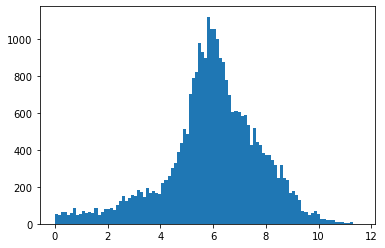

In [72]:
plt.hist(np.asarray(app_r_df['O2A_SIF']), bins = 100)

In [ ]:
app_r_df = app_r_df.dropna()

In [ ]:
app_r_df

In [ ]:
#app_r_df['simple_ratio'] = app_r_df['simple_ratio'] - app_r_df['simple_ratio'].min()
#app_r_df['NDVI'] = app_r_df['NDVI'] - app_r_df['NDVI'].min()
#app_r_df['EVI'] = app_r_df['EVI'] - app_r_df['EVI'].min()
#app_r_df['NDVI_re'] = app_r_df['NDVI_re'] - app_r_df['NDVI_re'].min()
#app_r_df['PRI'] = app_r_df['PRI'] - app_r_df['PRI'].min()

In [ ]:
app_r_df

In [ ]:
# save to csv

app_r_df.to_csv('field_o2b_sif_data.csv')

In [ ]:
plt.scatter(fluor_df['x'], fluor_df['y'], c=fluor_df['fluor'], s=0.1, cmap = 'turbo')

In [ ]:
plt.scatter(app_r_df['x'], app_r_df['y'], c=app_r_df['50'], s=0.1)